In [65]:
# Importing modules
try:
    import hsbalance as hs;
except ImportError:
    !pip install hsbalance
    import hsbalance as hs;
try:
    import matplotlib
except ImportError:
    !pip install matplotlib
    import matplotlib
try:
    import ipympl
except ImportError:
    !pip install ipympl
    import ipympl

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


# # Creating Model


1. Enter the initial vibration column vector `A`:
- each row represents the vibration at certain measuring plane.
- vibration is to be represented in the form ('amplitude' @ 'phase(degrees)')


In [67]:
A_math = [['42@68'], ['41@221'],['27@153'],['26@325']] 

B_math = [['53@54','30@75'],['37.5@220','57@230'],['33@144','22@160'],['28@315','35@324'] ]

U_math =['80@90','108@293']

4. Transform matrices to cartesian (complex number) form:

In [68]:
A = hs.convert_matrix_to_cart(A_math)
B = hs.convert_matrix_to_cart(B_math)
U = hs.convert_matrix_to_cart(U_math)
print('A=\n{}\n\nB=\n{}\n\nU = {}'.format(A, B, U))

A=
[[ 15.73347692+38.94172189j]
 [-30.94309279-26.89842019j]
 [-24.05717615+12.25774349j]
 [ 21.29795315-14.91298735j]]

B=
[[ 31.15261837+42.8779007j    7.76457135+28.97777479j]
 [-28.72666662-24.10453536j -36.63889375-43.66453326j]
 [-26.69756081+19.39691333j -20.67323766 +7.52444315j]
 [ 19.79898987-19.79898987j  28.3155948 -20.57248383j]]

U = [4.89858720e-15+80.j         4.21989619e+01-99.41452417j]


Transform back to mathematical expression form

In [69]:
alpha = hs.Alpha()  # create an instance of alpha class
alpha.add(A=A, B=B, U=U)  # calculate alpha from parameters

hs.convert_matrix_to_math(alpha.value)

#print(alpha)

array([['0.199 @ 284.3', '0.118 @ 298.3'],
       ['0.045 @ 321.6', '0.164 @ 318.2'],
       ['0.095 @ 20.3', '0.054 @ 12.6'],
       ['0.064 @ 162.9', '0.083 @ 28.1']], dtype='<U13')

In [70]:
my_model = hs.LeastSquares(A, alpha ,name='LeastSquares')

W = my_model.solve()

hs.convert_matrix_to_math(W)

my_model.rmse()

print(my_model.info())


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL TYPE
LeastSquares
End of MODEL TYPE
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL NAME
LeastSquares
End of MODEL NAME
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
INFLUENCE COEFFICIENT MATRIX

++++++++++++++++++++++++++++++++++++++++
Influence Coefficient Matrix
++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++
Coefficient Values
                Plane 1        Plane 2
Sensor 1  0.199 @ 284.3  0.118 @ 298.3
Sensor 2  0.045 @ 321.6  0.164 @ 318.2
Sensor 3   0.095 @ 20.3   0.054 @ 12.6
Sensor 4  0.064 @ 162.9   0.083 @ 28.1
End of Coefficient Values
++++++++++++++++

## Solving with Least squares:

In [71]:
model_LeastSquares = hs.LeastSquares(A, alpha, name='Splitt-LS') # Instantiate least square model

W_LeastSquares = model_LeastSquares.solve() #solve

hs.convert_matrix_to_math(W_LeastSquares)

residuals_LeastSquares = model_LeastSquares.expected_residual_vibration()
hs.convert_matrix_to_math(residuals_LeastSquares) # Expected residule vibrations

array([['3.817 @ 41.5'],
       ['14.454 @ 214.9'],
       ['10.507 @ 100.8'],
       ['17.321 @ 92.3']], dtype='<U14')

In [72]:
rmse_LeastSquares = model_LeastSquares.rmse()
rmse_LeastSquares

11.5247

In [73]:
#print(model_LeastSquares.info())

## Splitting plane Least Squares

In [74]:
split_BZA = model_LeastSquares.create_split()

angles = np.arange(0,360,45)

split_BZA.split_setup(0, max_number_weights_per_hole=1, holes_available=[angles]
                         ,weights_available=[80,129], max_weight_per_plane=209)

print(angles)

[  0  45  90 135 180 225 270 315]


In [75]:
%%timeit
split_BZA.split_solve()

40.8 ms ± 4.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
#Solving the split problem

split_BZA.split_solve()

split_BZA.results()

split_BZA.error()

split_BZA.error(options='equ')

split_BZA.error(options='problem_error') # getting the problem accuracy

split_BZA.update()

hs.convert_matrix_to_math(W_LeastSquares)  # The new W_LeastSquares

split_BZA.update(confirm='True')

hs.convert_matrix_to_math(W_LeastSquares)  # The new W_LeastSquares

model_LeastSquares.rmse()

print(model_LeastSquares.info())


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL TYPE
LeastSquares
End of MODEL TYPE
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL NAME
Splitt-LS
End of MODEL NAME
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
INFLUENCE COEFFICIENT MATRIX

++++++++++++++++++++++++++++++++++++++++
Influence Coefficient Matrix
++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++
Coefficient Values
                Plane 1        Plane 2
Sensor 1  0.199 @ 284.3  0.118 @ 298.3
Sensor 2  0.045 @ 321.6  0.164 @ 318.2
Sensor 3   0.095 @ 20.3   0.054 @ 12.6
Sensor 4  0.064 @ 162.9   0.083 @ 28.1
End of Coefficient Values
+++++++++++++++++++

C:\Users\shoai\anaconda3\envs\myenv\lib\site-packages\hsbalance\model.py:255: UserWarning: This will change your model optimum solution.Choose confirm=True
  warnings.warn('This will change your model optimum solution.'


## Solving with MinMax:

In [77]:
model_MinMax = hs.Min_max(A, alpha, name='MinMax') # Instantiate MinMax model

In [78]:
W_MinMax = model_MinMax.solve() #solve

In [79]:
hs.convert_matrix_to_math(W_MinMax)

array([['270.552 @ 316.8'],
       ['218.479 @ 102.6']], dtype='<U15')

In [80]:
residuals_MinMax = model_MinMax.expected_residual_vibration()
hs.convert_matrix_to_math(residuals_MinMax) # Expected residule vibrations

array([['12.702 @ 43.5'],
       ['13.95 @ 212.8'],
       ['13.95 @ 112.6'],
       ['13.95 @ 86.6']], dtype='<U13')

Root mean square error:

In [81]:
rmse_MinMax = model_MinMax.rmse()
rmse_MinMax

13.6383

In [82]:
print(model_MinMax.info())


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL TYPE
Min_max
End of MODEL TYPE
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL NAME
MinMax
End of MODEL NAME
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
INFLUENCE COEFFICIENT MATRIX

++++++++++++++++++++++++++++++++++++++++
Influence Coefficient Matrix
++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++
Coefficient Values
                Plane 1        Plane 2
Sensor 1  0.199 @ 284.3  0.118 @ 298.3
Sensor 2  0.045 @ 321.6  0.164 @ 318.2
Sensor 3   0.095 @ 20.3   0.054 @ 12.6
Sensor 4  0.064 @ 162.9   0.083 @ 28.1
End of Coefficient Values
+++++++++++++++++++++++++++

### MinMax_const


In order to constraint the weight to a certain limit we can perform a Constrained Minmax` model

In [83]:
weight_const ={0 : 240, 1: 240} # limit weight to 120 oz
model_MinMax_const = hs.Min_max(A, alpha, weight_const=weight_const, name='MinMax_const') # Instantiate MinMax model

In [84]:
W_MinMax_const = model_MinMax_const.solve() #solve

In [85]:
hs.convert_matrix_to_math(W_MinMax_const)

array([['240.0 @ 312.6'],
       ['202.428 @ 91.4']], dtype='<U14')

In [86]:
residuals_MinMax_const = model_MinMax_const.expected_residual_vibration()
hs.convert_matrix_to_math(residuals_MinMax_const) # Expected residule vibrations

array([['15.029 @ 46.0'],
       ['15.029 @ 234.7'],
       ['13.975 @ 117.1'],
       ['15.029 @ 65.0']], dtype='<U14')

Root mean square error:

In [87]:
rmse_MinMax_const = model_MinMax_const.rmse()
rmse_MinMax_const

14.7656

## Solving with Linear Matrix Inequality (LMI)

In [88]:
weight_const ={0 : 230, 1: 230} # limit weight to 120 oz
critical_planes = {1,2} #  setting the critical planes to be 2, 10 (note python start counting at 0)
V_max = 15 # max vibration for non-critical planes
model_LMI = hs.LMI(A, alpha, weight_const=weight_const, critical_planes=critical_planes, V_max=V_max
                     , name='LMI') # Instantiate LMI model

In [89]:
W_LMI = model_LMI.solve() #solve

In [90]:
hs.convert_matrix_to_math(W_LMI)

array([['230.0 @ 311.8'],
       ['189.376 @ 88.2']], dtype='<U14')

In [91]:
residuals_LMI = model_LMI.expected_residual_vibration()
hs.convert_matrix_to_math(residuals_LMI) # Expected residule vibrations

array([['15.0 @ 47.1'],
       ['17.15 @ 238.5'],
       ['13.735 @ 118.9'],
       ['15.0 @ 57.1']], dtype='<U14')

Root mean square error:

In [92]:
rmse_LMI = model_LMI.rmse()
rmse_LMI

15.2212

In [93]:
print(model_LMI.info())


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL TYPE
LMI
End of MODEL TYPE
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL NAME
LMI
End of MODEL NAME
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
INFLUENCE COEFFICIENT MATRIX

++++++++++++++++++++++++++++++++++++++++
Influence Coefficient Matrix
++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++
Coefficient Values
                Plane 1        Plane 2
Sensor 1  0.199 @ 284.3  0.118 @ 298.3
Sensor 2  0.045 @ 321.6  0.164 @ 318.2
Sensor 3   0.095 @ 20.3   0.054 @ 12.6
Sensor 4  0.064 @ 162.9   0.083 @ 28.1
End of Coefficient Values
++++++++++++++++++++++++++++++++++

## Plotting

In [94]:
models = [model_LeastSquares, model_MinMax, model_MinMax_const, model_LMI, my_model]

In [95]:
def plot_models(models):
    residule_vibration = {model.name:abs(model.expected_residual_vibration().ravel()) for model in models}
    rmse = {model.name:model.rmse() for model in models}
    fig, (ax0, ax1) = plt.subplots(2,1)
    ax0.bar(rmse.keys(), rmse.values())
    plt.xlabel('Models')
    plt.ylabel('Vibration');
    models_number = len(residule_vibration.values())
    measuring_points = max((len(array) for array in residule_vibration.values()))

    jet= plt.get_cmap('jet')
    colors = iter(jet(np.linspace(0,1,models_number)))

    step = 0
    for array in residule_vibration.values():
        ax1.bar(np.arange(len(array)) + step, array, color = next(colors), width = 0.8/models_number)
        step += 0.9 / (models_number+1)
    ax1.legend([model.name for model in models])
    ax1.set_xticks(range(measuring_points), ['Sens. '+ str(point) for point in range(1, 1+measuring_points)],
                  rotation =30);

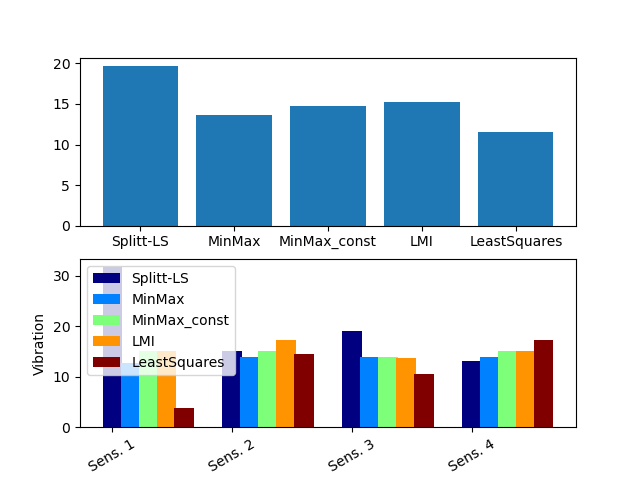

In [96]:
plot_models(models)